In [68]:
import numpy as np

In [69]:
from sklearn.datasets import make_classification 

In [70]:
X,Y=make_classification(
    n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=3,
)

In [71]:
print(X.shape)

(400, 2)


In [72]:
print(Y)
# Notice Our Out Put is 0 and 1 ...so we need to convert it to -1 and 1 
# Y==0 return an array of True and False . Now we need to convert True Indexes to -1 
# Y[Y==0]=-1 Converts all the true indexes to have a value -1 
# Name of this technique is broadcasting
Y[Y==0]=-1
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]
[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1

In [73]:
import matplotlib.pyplot as plt 

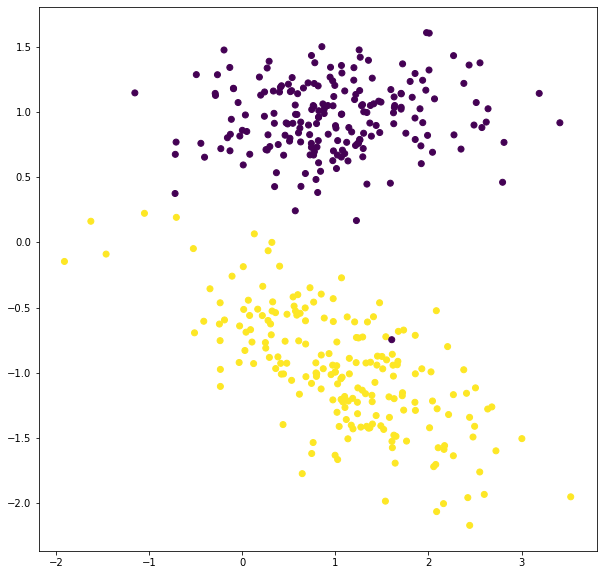

(400, 2)


In [76]:
# Visualizing The Data
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
print(X.shape)

In [77]:
# W=1*n 
# X=m*n 
#where m is the number of training examples and n is the number of features 
class SVM:
    def __init__(self,C=1.0):
        self.b=0 # bias 
        self.W=0 # weights
        self.C=C # penalty 
    def hingeLoss(self,W,X,Y,b):
        # Calculates The Loss
        loss=0.0
        loss+=0.5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,1-ti)
        # loss is a 1*1 sized array so output would be like [[100]] for eg. => Solution loss[0][0]
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate=0.001, maxItr=1000):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        n=learning_rate
        C=self.C
        #Initializing the Model Parameters 
        W=np.zeros((1,no_of_features))
        b=0
        #print(self.hingeLoss(W,X,Y,b))
        losses=[]
        for i in range(maxItr):
            # Training loop 
            l=self.hingeLoss(W,X,Y,b)
            losses.append(l)  
            #print(losses)
            # Batch gradient descent[paper] with random shuffling
            
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 Gradient for the batch 
                gradw=0 
                gradb=0
                for j in range(batch_start,batch_start+batch_size):
                    # ids[j] refers to the example id which we are using 
                    if j<no_of_samples:
                        sample_id=ids[j] #just for ease of typing 
                        ti=Y[sample_id]*(np.dot(W,X[sample_id].T)+b)
                        if(ti>=1):
                            gradw+=0 #C*0*Y[i]*X[i]
                            gradb+=0#0+C*0*Y[i]
                        else:
                            gradw+= -C*Y[sample_id]*X[sample_id]
                            gradb+= 0-C*Y[sample_id]
                W=W-n*(W+gradw)
                b=b-n*gradb
            self.W=W
            self.b=b
        return W,b,losses

In [78]:
mySVM=SVM()

In [79]:
W,b,losses=mySVM.fit(X,Y)

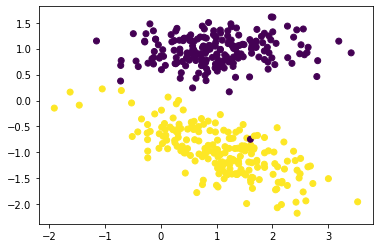

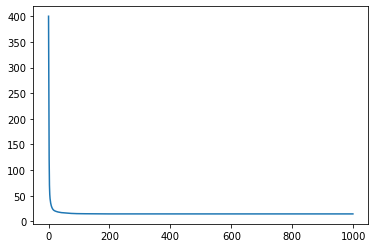

In [80]:
# Basic Visulaization 
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
plt.plot(losses)
plt.show()

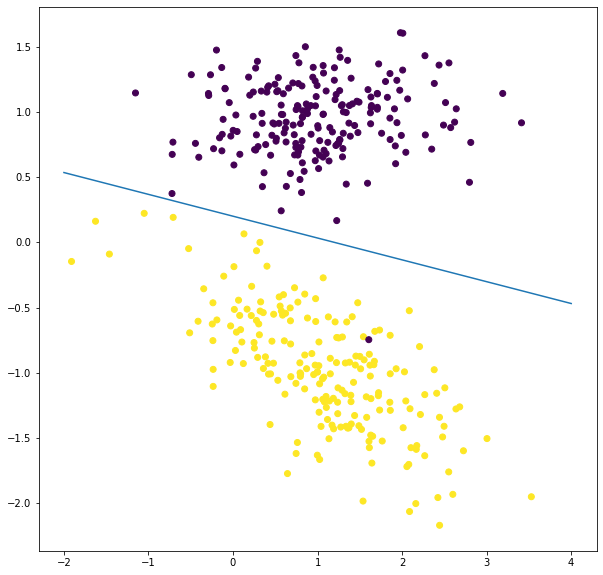

In [81]:
# How to plot the separating line 
# W 1*n 
# b is just a bias value 
# Line Separating => W*X+ b=0
# We need to plot b/w x2 and x1 
# w1x1+w2x2 +b =0 
# x2=-(w1x1+b)/w2
def plotHyperplane(W,b):
    w1=W[0]
    w2=W[1]
    plt.figure(figsize=(10,10))
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2
    plt.plot(x1,x2)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
plotHyperplane(W[0],b)

In [83]:
# Code Showing how the we can generate ids to randomly pick up data points
ids=np.arange(100)
print(ids)
np.random.shuffle(ids)
print(ids)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[65 38 80 24 42 66 41 60  4  7  3 85 43 58 82 20 94 64 30 98 46 10 61 55
 22 96 12 59 86 18 25 32 14 47 67 84 26 35  5 27 29 57 50 99 95 97 81 77
 34 19 54 23 75 63 31 62 51 36 15 78 88 69 49 48  1 17 73 79 45 87  2 91
 13 74  0 89  6 16 68 11 52 40 72 33 44 56 71 28 93 53 39 90 76 70 21 37
 92 83  8  9]
